# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [22]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

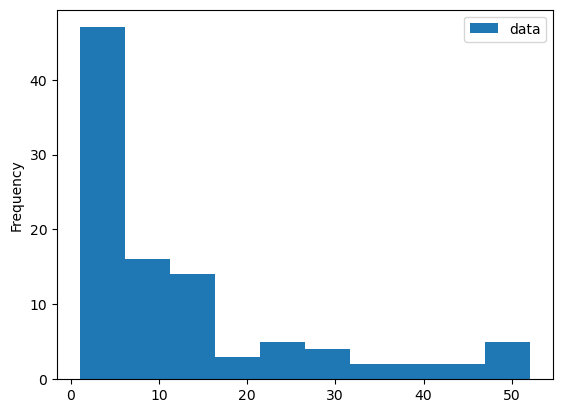

In [23]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

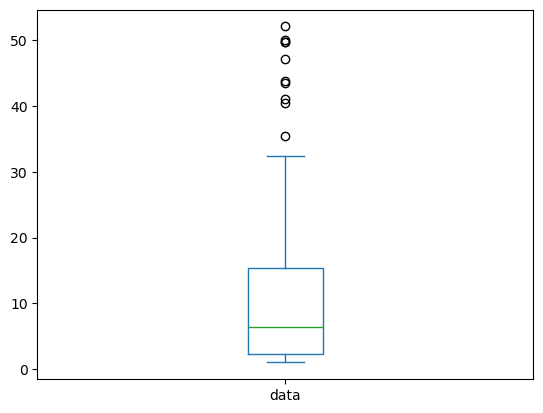

In [24]:
df.plot.box()

**Histogram:**
- Pros: Shows the distribution of drug prices, helping identify common price ranges. Easy to interpret for spotting clusters or trends.
- Cons: Lacks summary statistics like median or outliers. Harder to spot extreme prices.  
  
**Boxplot:**
- Pros: Displays key statistics (median, quartiles, outliers), highlighting extreme drug prices.
- Cons: Less intuitive and doesn’t show the full distribution or shape of the data.  
  
**Which would you choose?**
- Histogram is best for seeing the overall distribution and patterns.
- Boxplot is better for identifying summary statistics and outliers.  
  
**Suggested Modifications:**
- Histogram: Adjust bin sizes for clarity, add gridlines or reference lines.
- Boxplot: Consider color-coding boxes and adding labels for the median and IQR.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [29]:
#!pip install --upgrade kagglehub
#!pip install chardet
#!pip install --upgrade charset_normalizer
import kagglehub
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

In [26]:
# Download the dataset from Kaggle
dataset_path = kagglehub.dataset_download("shashwatwork/web-page-phishing-detection-dataset")

dataset_path_to_file = os.path.join(dataset_path, "dataset_phishing.csv")

df = pd.read_csv(dataset_path_to_file)
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

This dataset contains information about web page phishing detection. It includes various features that describe characteristics of URLs and their domains, helping to distinguish between legitimate and phishing websites. The main goal of this analysis is to explore the relationship between different features and the status of the website (either legitimate or phishing).

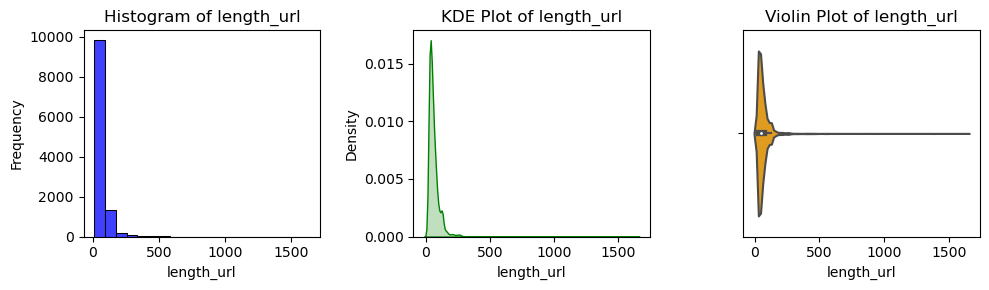

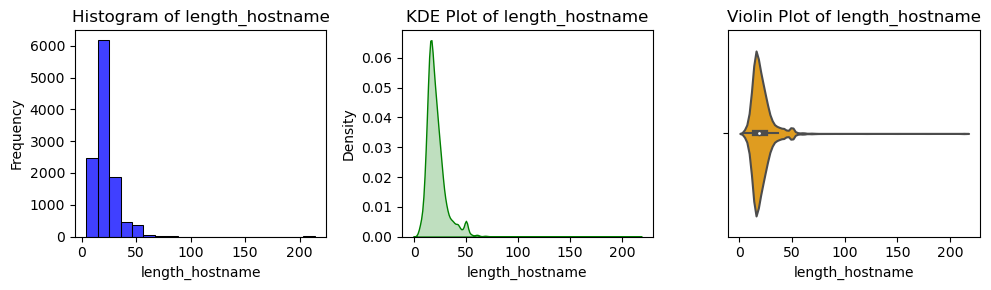

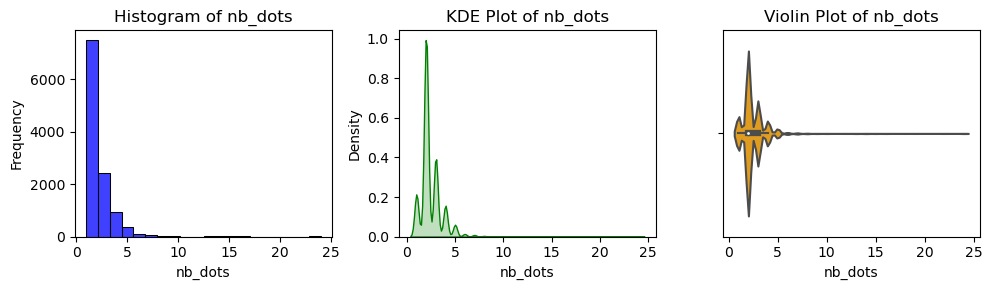

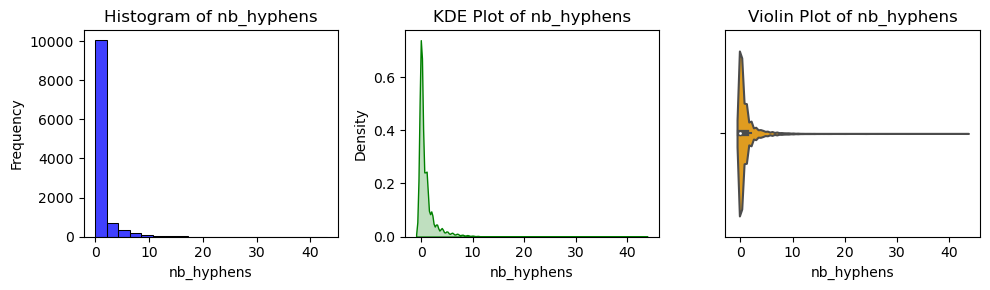

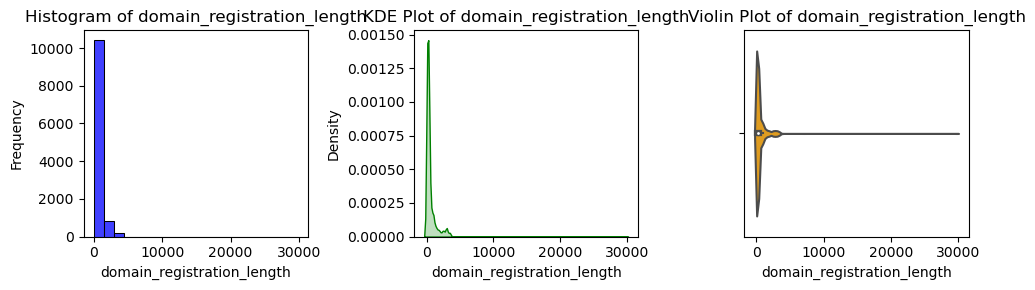

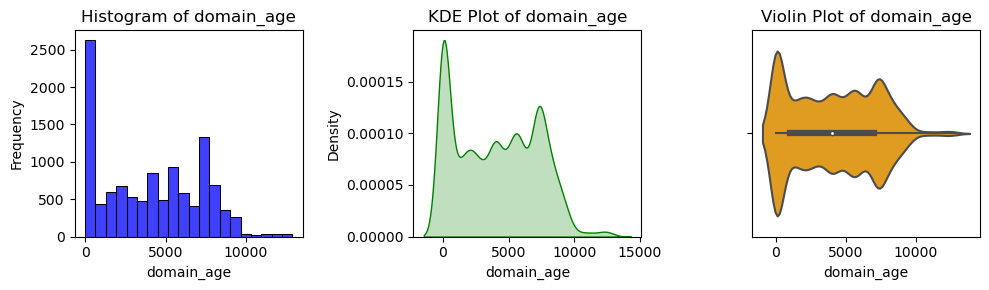

In [30]:
features = ['length_url', 'length_hostname', 'nb_dots', 'nb_hyphens', 'domain_registration_length', 'domain_age']

# Create a histogram, kde plot, and violin plot for each feature
for feature in features:
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature], kde=False, color='blue', bins=20)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # KDE Plot
    plt.subplot(1, 3, 2)
    sns.kdeplot(df[feature], fill=True, color='green')  # Replaced shade with fill
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=df[feature], color='orange')
    plt.title(f'Violin Plot of {feature}')
    plt.xlabel(feature)
    
    plt.tight_layout()
    plt.show()

### Feature Distribution Analysis:  

**1. length_url:**  
- Distribution: Highly skewed with most URLs being short.
- Insight: Long URLs are rare.  
  
**2. length_hostname:**
- Distribution: Concentrated around shorter hostnames.
- Insight: Few domains have long hostnames.  
  
**3. nb_dots:**
- Distribution: Most domains have 0 to 5 dots.
- Insight: Few URLs use more than 5 dots.  
  
**4. nb_hyphens:**
- Distribution: Concentrated at 0 to 2 hyphens.
- Insight: Most URLs have few hyphens.  
  
**5. domain_registration_length:**
- Distribution: Skewed right, with most domains having short registration lengths.
- Insight: Few domains have very long registration periods.  
  
**6. domain_age:**
- Distribution: Multi-modal with various age ranges.
- Insight: There are multiple groups of domain ages.  
  
**Key Observations:**
- Outliers: Present, especially in domain_registration_length and domain_age.
- Usability: The data is usable, but skewed distributions and outliers need attention.
- Shape: Mostly skewed distributions with some multi-modal features.

This part of the analysis provided a comprehensive look at the distributions of key features from the phishing detection dataset. I used various visualizations (histograms, KDE plots, and violin plots) to understand the spread, central tendencies, and outliers. The visualizations helped in identifying key patterns, such as the skewed nature of most features and the presence of outliers, particularly in domain_registration_length and domain_age.

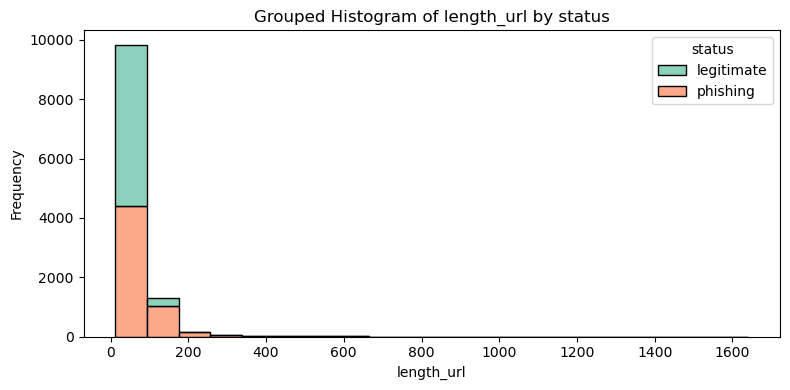

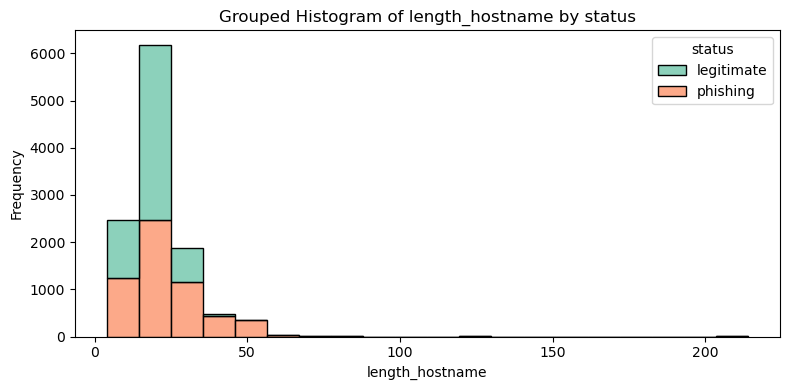

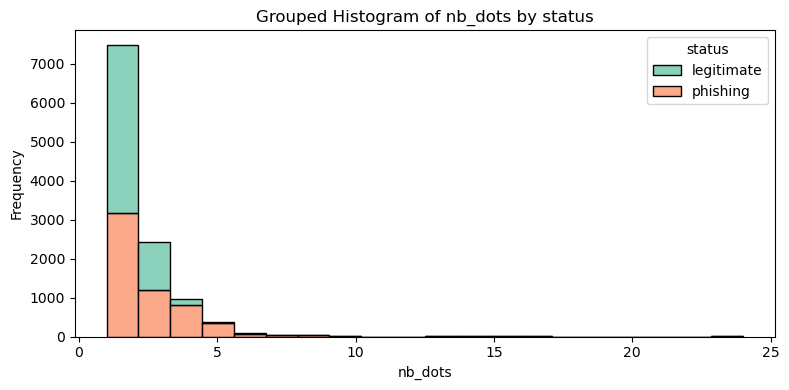

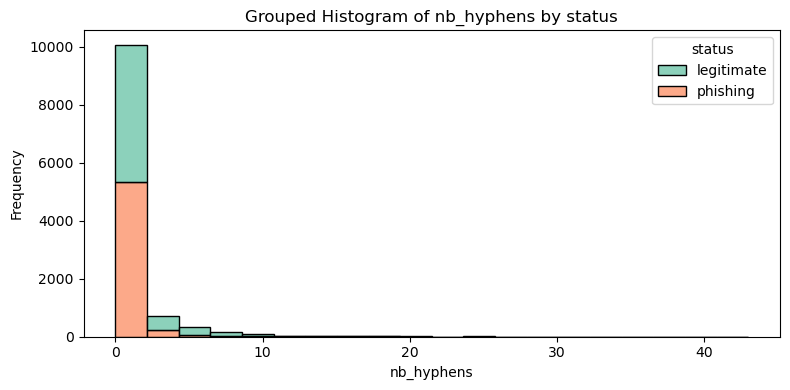

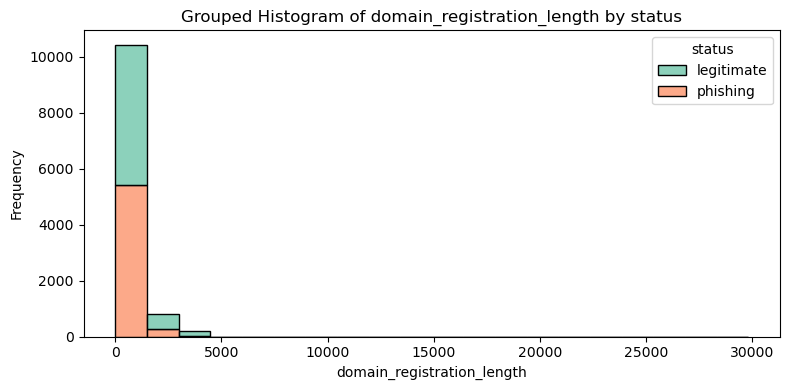

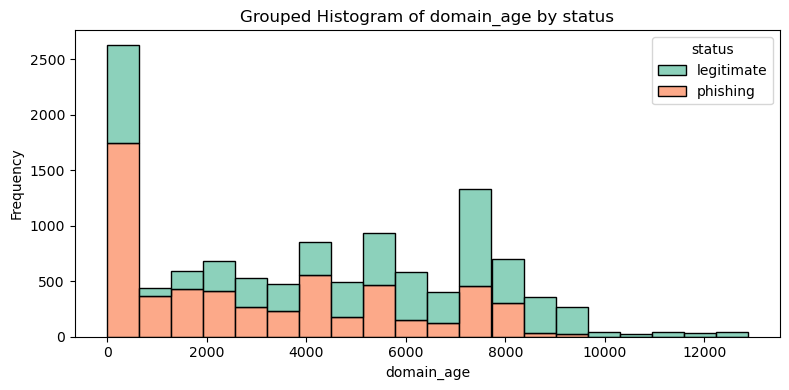

In [35]:
# Grouped histograms by 'status' column
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df, x=feature, hue="status", kde=False, bins=20, palette="Set2", multiple="stack")
    plt.title(f'Grouped Histogram of {feature} by status')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

**1. length_url:**  
Phishing URLs: The histogram shows that phishing URLs have a similar distribution to legitimate URLs, but with more variability in the length. There are some instances of longer URLs, though they still appear to mostly be under 200 characters.
Legitimate URLs: Most of the legitimate URLs are concentrated in the lower range (under 200 characters), with few extreme outliers.  
  
**2. length_hostname:**  
Phishing URLs: The phishing websites also have a wide range of hostname lengths, with a few extreme outliers at higher values, though the majority are within the lower range.
Legitimate URLs: Similarly, the legitimate URLs are mostly under 50 characters, with a concentration near the 0 value, indicating very short hostnames for most legitimate websites.
  
**3. nb_dots:**  
Phishing URLs: The number of dots in phishing URLs is mostly small, but there are some spikes as well, with a few URLs having multiple dots (notably more than legitimate URLs).
Legitimate URLs: Most legitimate URLs have fewer dots, showing a more concentrated distribution at the lower end (around 0-3).
  
**4. nb_hyphens:**  
Phishing URLs: Similar to the nb_dots distribution, phishing URLs tend to have fewer hyphens, but the higher values show that some phishing URLs contain multiple hyphens, suggesting a possible attempt to mimic legitimate URLs by adding special characters.
Legitimate URLs: The distribution is concentrated at lower values, with very few legitimate URLs containing more than 3 hyphens.
  
**5. domain_registration_length:**  
Phishing Domains: The phishing domains show a very concentrated registration length of 0, indicating newly registered domains.
Legitimate Domains: On the other hand, legitimate domains tend to have a broader range of registration lengths, showing that they are older and have been registered for a longer period.
  
**6. domain_age:**  
Phishing Domains: Phishing domains are generally newer, as seen in the peak around 0 to 2,000 days (less than 6 years old).
Legitimate Domains: Legitimate domains show a much broader age range, with a concentration in domains that are several years old (over 5,000 days, or about 13-14 years).

In [37]:
df['status'].unique()

array(['legitimate', 'phishing'], dtype=object)

In [38]:
df['status'].isnull().sum()

0

In [40]:
df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

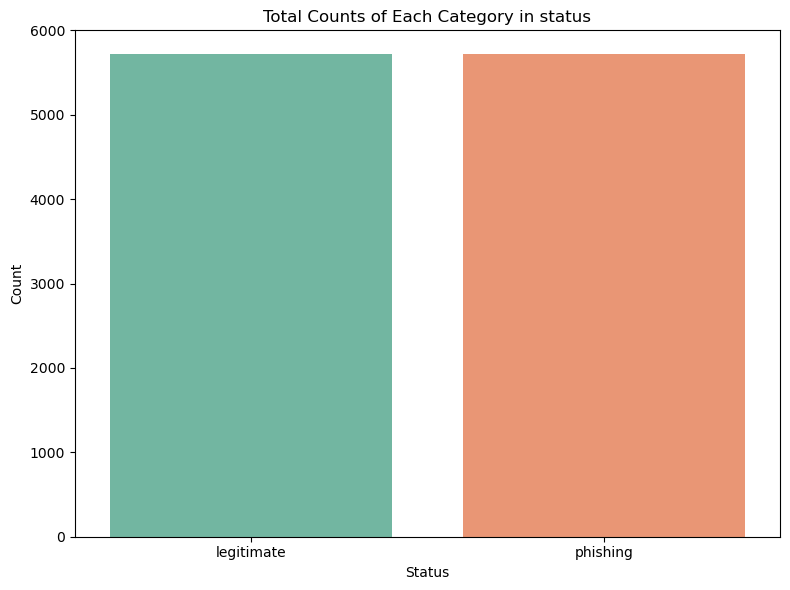

In [39]:
# Bar plot for counts of 'status' categories
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df, palette="Set2")
plt.title('Total Counts of Each Category in status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The bar plot above displays the total counts of each category in the "status" column of the dataset. It shows a balanced distribution, with 5715 entries for each category: "legitimate" and "phishing." This indicates that both categories are equally represented, which is important for ensuring fairness and avoiding class imbalance in further analysis or machine learning models.

In [41]:
for feature in features:
    mean_value = df[feature].mean()
    median_value = df[feature].median()
    mode_value = df[feature].mode()[0]

    print(f'{feature}:')
    print(f'  Mean: {mean_value}')
    print(f'  Median: {median_value}')
    print(f'  Mode: {mode_value}')
    print('-' * 10)

length_url:
  Mean: 61.12668416447944
  Median: 47.0
  Mode: 26
----------
length_hostname:
  Mean: 21.090288713910763
  Median: 19.0
  Mode: 16
----------
nb_dots:
  Mean: 2.4807524059492563
  Median: 2.0
  Mode: 2
----------
nb_hyphens:
  Mean: 0.9975503062117236
  Median: 0.0
  Mode: 0
----------
domain_registration_length:
  Mean: 492.53219597550304
  Median: 242.0
  Mode: 0
----------
domain_age:
  Mean: 4062.5437445319335
  Median: 3993.0
  Mode: -1
----------


These values provide insights into the data's distribution. For example, the mean for "length_url" is higher than the median, suggesting a right-skewed distribution, with some long URLs causing the mean to increase. Similarly, the mode for "length_url" is 26, showing that this value is the most frequently occurring. Mode values of 0 for "nb_hyphens" and "domain_registration_length" suggest these features are mostly zero, which may indicate that the majority of entries do not contain hyphens or have a very short domain registration. The negative mode for "domain_age" (-1) likely represents missing or placeholder values.

### Conclusion
**Are the data what you expect? Are the data likely to be usable? If they are not usable, find some new data!**  
The data appear to be usable based on the analysis. There are some features, like "domain_age" and "domain_registration_length", with a mode of zero or negative values, which suggests possible data issues (e.g., missing data). However, overall, the dataset contains meaningful variables related to phishing detection that can be analyzed effectively. The data is expected to be useful for classification models to differentiate between legitimate and phishing websites.
  
**What is the overall shape of the distribution? Is it normal, skewed, bimodal, uniform, etc.?**  
The overall distribution of many features is right-skewed (positive skew), especially for features like "length_url" and "domain_registration_length". This indicates that most data points cluster at the lower end of the range, with some extreme values stretching the tail to the right. Features like "nb_dots" and "nb_hyphens" have a similar skew, with a concentration of low values and few higher values.  
  
**Are there any outliers present? (Data points that are far from the others.)**  
Yes, there are several features with potential outliers, particularly in "length_url", "length_hostname", and "domain_registration_length". These features have values that deviate significantly from the rest, especially in the higher ranges. For instance, URLs with lengths over 1000 characters or domains registered for thousands of days might be considered outliers.  
  
**If there are multiple related histograms, how does the distribution change across different groups?**  
The grouped histograms show that phishing URLs tend to have slightly higher "length_url" values, but the overall distribution across legitimate and phishing statuses is quite similar. For features like "length_hostname" and "nb_dots", the distributions for both phishing and legitimate URLs overlap, making it harder to distinguish between the two groups based on these features alone.  
  
**What are the minimum and maximum values represented in each histogram?**  
The minimum values are mostly 0, with the exception of "domain_age" and "domain_registration_length" (which also have negative values for some entries). The maximum values vary: "length_url" has a maximum of around 1600, "length_hostname" reaches up to 200, "nb_dots" and "nb_hyphens" go up to around 25 and 40 respectively, and "domain_registration_length" can go as high as 30,000.  
  
**How do bin sizes affect the histogram? Does changing the bin width reveal different patterns in the data?**  
The bin sizes used here (20 bins for most features) provide a general view of the distribution, but adjusting the bin width can change how granular the insights are. With more bins, finer details of the distribution might be revealed (e.g., identifying small peaks in the data). However, too many bins might lead to a cluttered representation, while too few bins can obscure underlying patterns.  
  
**Does the distribution appear normal, or does it have a different distribution?**  
The distributions do not appear normal (bell-shaped). They are generally skewed, with a long right tail for many features. The data are better represented by distributions like exponential or log-normal rather than a standard normal distribution.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

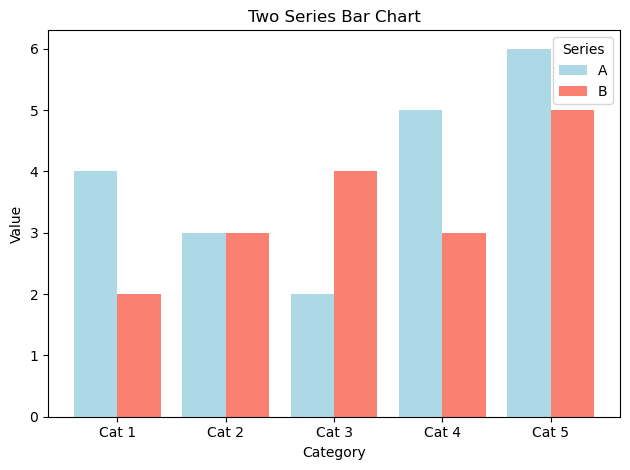

In [43]:
# Sample data
categories = ['Cat 1', 'Cat 2', 'Cat 3', 'Cat 4', 'Cat 5']
A = [4, 3, 2, 5, 6]
B = [2, 3, 4, 3, 5]

x = np.arange(len(categories))

width = 0.4

# Create two series bar chart
plt.bar(x - width/2, A, width=width, color='lightblue', label='A')
plt.bar(x + width/2, B, width=width, color='salmon', label='B')

plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Two Series Bar Chart')
plt.xticks(x, categories)
plt.legend(title='Series')
plt.tight_layout()
plt.show()